In [12]:
from pathlib import Path
import pandas as pd

# Define paths relative to this notebook's location (script/ folder)
# .parent goes up one level to the root project folder
current_dir = Path.cwd()
project_root = current_dir.parent
meta_dir = project_root / "metadata"
data_dir = project_root / "data"

years = ["1981", "1988", "1993"]
all_manifestos = []

for year in years:
    meta_file = meta_dir / f"{year}_archelect_search.csv"
    
    print(f"Checking: {meta_file}")
    
    if meta_file.exists(): # pathlib is often more reliable here
        print(f"✅ Found {year} metadata!")
        df_year = pd.read_csv(meta_file)
        df_year['year'] = year
        
        def fetch_text(manifesto_id):
            # Matches data/YEAR/legislatives/ID.txt
            txt_path = data_dir / year / "legislatives" / f"{manifesto_id}.txt"
            if txt_path.exists():
                return txt_path.read_text(encoding='utf-8')
            return None

        df_year['text'] = df_year['id'].apply(fetch_text)
        all_manifestos.append(df_year)
    else:
        print(f"❌ Still not found. Path checked: {meta_file.absolute()}")

if all_manifestos:
    master_df = pd.concat(all_manifestos, ignore_index=True)
    print(f"Success! Created DataFrame with {len(master_df)} rows.")
else:
    print("All metadata files failed to load. Try the Finder 'Always Keep on This Device' fix.")

Checking: /Users/cynthiafrancis/Library/CloudStorage/OneDrive-EcolePolytechnique/Ecole Polytechnique/Year M2/S2/ML for NLP/Project/NLP-Gender-Rhetoric-French-Electoral-Manifestos/metadata/1981_archelect_search.csv
✅ Found 1981 metadata!
Checking: /Users/cynthiafrancis/Library/CloudStorage/OneDrive-EcolePolytechnique/Ecole Polytechnique/Year M2/S2/ML for NLP/Project/NLP-Gender-Rhetoric-French-Electoral-Manifestos/metadata/1988_archelect_search.csv
✅ Found 1988 metadata!
Checking: /Users/cynthiafrancis/Library/CloudStorage/OneDrive-EcolePolytechnique/Ecole Polytechnique/Year M2/S2/ML for NLP/Project/NLP-Gender-Rhetoric-French-Electoral-Manifestos/metadata/1993_archelect_search.csv
✅ Found 1993 metadata!
Success! Created DataFrame with 12498 rows.


In [15]:
master_df.head()

,id,date,subject,title,contexte-election,contexte-tour,cote,departement,departement-nom,departement-insee,...,suppleant-profession,suppleant-mandat-en-cours,suppleant-mandat-passe,suppleant-associations,suppleant-autres-statuts,suppleant-soutien,suppleant-liste,suppleant-decorations,year,text
0,EL134_L_1981_06_001_01_1_PF_01,1981-06-14,France;Assemblée Nationale;Ve République;Élect...,"Élections législatives de 1981, Ain - 01, circ...",législatives,1,EL134,01,Ain,01 - Ain,...,infirmière,non mentionné,non mentionné,syndicat,non mentionné,Parti socialiste unifié,non mentionné,non,1981,ELECTIONS LEGISLATIVES - 14 JUIN 1981 AIN 1e C...
1,EL134_L_1981_06_001_01_1_PF_02,1981-06-14,Élections législatives;Ve République;Assemblée...,"Élections législatives de 1981, Ain - 01, circ...",législatives,1,EL134,01,Ain,01 - Ain,...,non mentionné,maire-adjoint,non mentionné,syndicat,non mentionné,Parti communiste français,Union de la gauche,non,1981,Sciences Po / fonds CEVIPOF\nELECTIONS LÉGISLA...
2,EL134_L_1981_06_001_01_1_PF_03,1981-06-14,Élections législatives;Ve République;France;As...,"Élections législatives de 1981, Ain - 01, circ...",législatives,1,EL134,01,Ain,01 - Ain,...,docteur,non mentionné,non mentionné,non mentionné,non mentionné,Parti socialiste;Mouvement des radicaux de gauche,non mentionné,non,1981,Sciences Po / fonds CEVIPOF\nRÉPUBLIQUE FRANÇA...
3,EL134_L_1981_06_001_01_1_PF_04,1981-06-14,Assemblée Nationale;France;Ve République;Élect...,"Élections législatives de 1981, Ain - 01, circ...",législatives,1,EL134,01,Ain,01 - Ain,...,commerçant,non mentionné,non mentionné,culture;politique,non mentionné,Fédération des socialistes démocrates,non mentionné,non,1981,REPUBLIQUE FRANÇAISE - ELECTIONS LEGISLATIVES ...
4,EL134_L_1981_06_001_01_1_PF_05,1981-06-14,Assemblée Nationale;Élections législatives;Ve ...,"Élections législatives de 1981, Ain - 01, circ...",législatives,1,EL134,01,Ain,01 - Ain,...,chirurgien,non mentionné,député suppléant,professionnel,non mentionné,Rassemblement pour la République;Union pour la...,Union pour la nouvelle majorité,non,1981,REPUBLIQUE FRANÇAISE - PREMIERE CIRCONSCRIPTIO...


titulaire-sexe
homme            10464
femme             1306
non déterminé      728
Name: count, dtype: int64
titulaire-sexe  femme  homme  non déterminé
year                                       
1981              316   2799              6
1988              347   3109             84
1993              643   4556            638


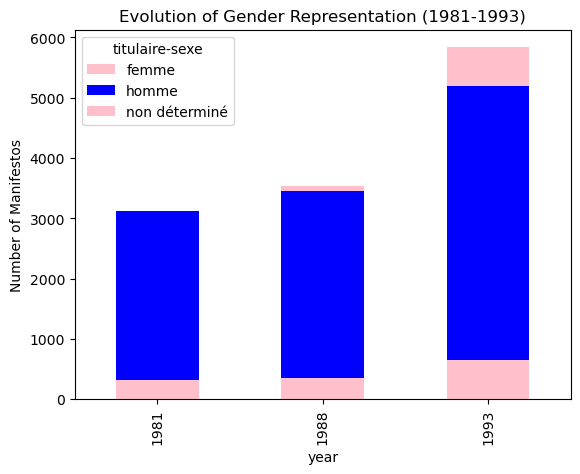

In [14]:
import matplotlib.pyplot as plt

# 1. Total counts
print(master_df['titulaire-sexe'].value_counts(dropna=False))

# 2. Year-by-year counts
gender_by_year = pd.crosstab(master_df['year'], master_df['titulaire-sexe'])
print(gender_by_year)

# 3. Plot the evolution
gender_by_year.plot(kind='bar', stacked=True, color=['pink', 'blue'])
plt.title('Evolution of Gender Representation (1981-1993)')
plt.ylabel('Number of Manifestos')
plt.show()